In [1]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Load MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Normalize pixel values to the range [0, 1] and reshape data to include channel dimension
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0
x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)

# Convert labels to one-hot encoded format
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

# Split the training data into training and validation sets
validation_split = 0.1  # Use 10% of training data for validation
num_val_samples = int(validation_split * x_train.shape[0])
x_val = x_train[:num_val_samples]
y_val = y_train[:num_val_samples]
x_train = x_train[num_val_samples:]
y_train = y_train[num_val_samples:]

In [13]:
print(x_train.shape)
print(x_val.shape)
print(x_test.shape)

print(y_train.shape)
print(y_val.shape)
print(y_test.shape)

(54000, 28, 28, 1)
(6000, 28, 28, 1)
(10000, 28, 28, 1)
(54000, 10)
(6000, 10)
(10000, 10)


In [3]:
# Define the VGGNet-like architecture
def build_vggnet():
    model = models.Sequential([
        # Block 1
        layers.Input(shape=(28, 28, 1)),  # Input layer
        layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
        layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
        layers.MaxPooling2D((2, 2)),

        # Block 2
        layers.Conv2D(128, (3, 3), activation='relu', padding='same'),
        layers.Conv2D(128, (3, 3), activation='relu', padding='same'),
        layers.MaxPooling2D((2, 2)),

        # Block 3
        layers.Conv2D(256, (3, 3), activation='relu', padding='same'),
        layers.Conv2D(256, (3, 3), activation='relu', padding='same'),
        layers.MaxPooling2D((2, 2)),

        # Flatten and Fully Connected Layers
        layers.Flatten(),
        layers.Dense(512, activation='relu'),
        layers.Dropout(0.5),
        layers.Dense(10, activation='softmax')
    ])
    return model

In [4]:
# Initialize data augmentation
augmenter = ImageDataGenerator(
    rotation_range=10,  # Rotate images up to 10 degrees
    width_shift_range=0.1,  # Shift images horizontally up to 10%
    height_shift_range=0.1,  # Shift images vertically up to 10%
    zoom_range=0.1  # Zoom in on images up to 10%
)

In [5]:
# Build and compile the VGGNet-like model
model = build_vggnet()
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [11]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 28, 28, 64)          │             640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 28, 28, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 14, 14, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 14, 14, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 14, 14, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 7, 7, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 7, 7, 256)           │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 7, 7, 256)           │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 3, 3, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 2304)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 512)                 │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │           5,130 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,329,546 (8.89 MB)

 Trainable params: 2,329,546 (8.89 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Train the model with data augmentation and validate on validation set
history = model.fit(
    augmenter.flow(x_train, y_train, batch_size=128),  # This part uses the `augmenter` object to generate augmented training data. The `flow()` method takes the training data (`x_train` and `y_train`) and produces batches of augmented images and labels. The `batch_size=128` specifies that each batch will contain 128 samples.
    steps_per_epoch=len(x_train) // 128, #This argument defines the number of steps (batches) to run in each epoch. It is calculated by dividing the total number of training samples (`len(x_train)`) by the batch size (128). This ensures that the model processes all training data in each epoch.
    epochs=5,
    validation_data=(x_val, y_val)
)

Epoch 1/5


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


421/421 ━━━━━━━━━━━━━━━━━━━━ 1055s 2s/step - accuracy: 0.7985 - loss: 0.6066 - val_accuracy: 0.9880 - val_loss: 0.0425
Epoch 2/5
  1/421 ━━━━━━━━━━━━━━━━━━━━ 14:54 2s/step - accuracy: 0.9844 - loss: 0.0315

/usr/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


421/421 ━━━━━━━━━━━━━━━━━━━━ 32s 72ms/step - accuracy: 0.9844 - loss: 0.0315 - val_accuracy: 0.9887 - val_loss: 0.0421
Epoch 3/5
421/421 ━━━━━━━━━━━━━━━━━━━━ 1049s 2s/step - accuracy: 0.9795 - loss: 0.0681 - val_accuracy: 0.9918 - val_loss: 0.0291
Epoch 4/5
421/421 ━━━━━━━━━━━━━━━━━━━━ 35s 78ms/step - accuracy: 0.9844 - loss: 0.0311 - val_accuracy: 0.9915 - val_loss: 0.0306
Epoch 5/5
421/421 ━━━━━━━━━━━━━━━━━━━━ 1074s 3s/step - accuracy: 0.9856 - loss: 0.0501 - val_accuracy: 0.9912 - val_loss: 0.0341


The steps_per_epoch parameter is essential when using data augmentation (or a data generator) because the generator does not directly use the full dataset but instead creates augmented batches on the fly. Here's why it's needed:

**Role of steps_per_epoch**
- With Data Augmentation: The augmenter.flow() generates an infinite stream of augmented data batches. Since the data generator never "runs out" of data, steps_per_epoch tells the model how many batches to process in each epoch.
- Without Data Augmentation: If you train directly on the dataset (e.g., model.fit(x_train, y_train)), the model automatically knows the size of the dataset and divides it into batches based on the batch_size. In this case, steps_per_epoch is not needed because the data is finite and well-defined.


**Why It's Needed**
- To Control Epoch Size: Without steps_per_epoch, the model would keep processing batches indefinitely because the generator can keep producing augmented data forever.
- To Ensure Consistency: By defining steps_per_epoch, you make sure the model processes a consistent number of data samples per epoch, regardless of augmentation.


In [ ]:
# Save the trained model to a file
model.save("vggnet_mnist.keras")

In [ ]:
# Load the saved model from the file
loaded_model = tf.keras.models.load_model("vggnet_mnist.keras")

# Evaluate the loaded model on the test data
test_loss, test_accuracy = loaded_model.evaluate(x_test, y_test, verbose=0)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")

Test Accuracy: 99.35%


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 130ms/step


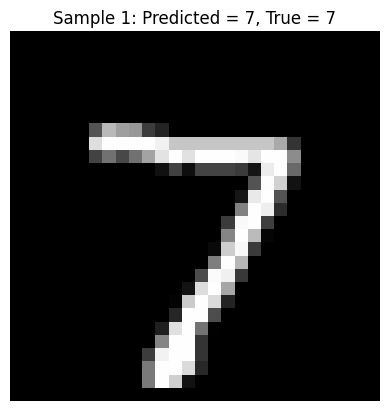

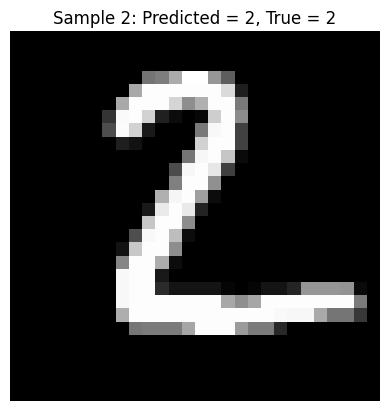

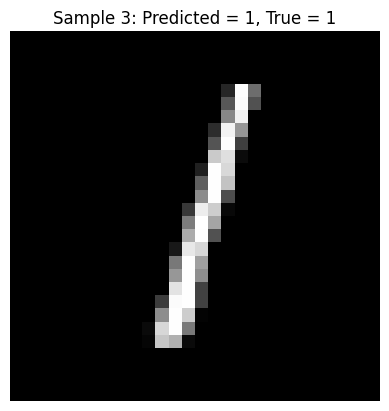

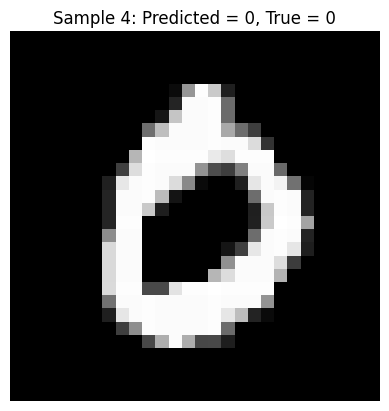

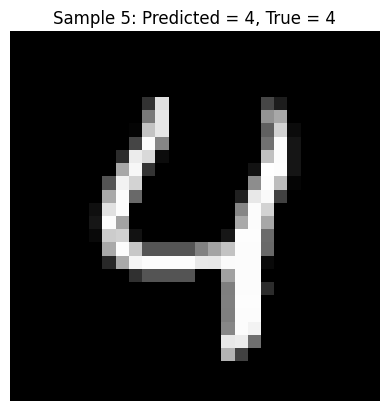

In [ ]:
# Use the loaded model to make predictions on the first 5 test samples
predictions = loaded_model.predict(x_test[:5])

# Display the predictions and compare with true labels along with the actual images
for i, prediction in enumerate(predictions):
    predicted_label = np.argmax(prediction)  # Get the label with the highest probability
    true_label = np.argmax(y_test[i])        # Get the true label

    # Display the image
    plt.imshow(x_test[i].squeeze(), cmap='gray')
    plt.title(f"Sample {i + 1}: Predicted = {predicted_label}, True = {true_label}")
    plt.axis('off')
    plt.show()

-  The augmentation does not physically increase the size of the dataset stored in memory or on disk. Instead, it generates augmented images temporarily during training.
- The augmented images are generated in real-time, on-the-fly, as the model processes batches of data. This means that every epoch may see slightly different augmented versions of the original images.